# Repeated Price Competition with Differentiated Products

* Write player functions, `player1.py`, `player2.py`, ... in the folder `./players/`. 
* Run this notebook: it will automatically read them all.

In [1]:
from game_tournament.game import RepeatedBertrandGame, Tournament
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

%load_ext autoreload
%autoreload 2 

# Reading in player modules 

In [2]:
# later, we will give the path directly to a function
player_path = './players/'

# General setup

In [3]:
c = 0.5
pmin = c
pmax = 5.

### Demand curve
$$ D_i(p_i, p_j) = \frac{\exp(\beta_0-\beta_1 p_i)}{1 + \exp(\beta_0 - \beta_1 p_i) + \exp(\beta_0 - \beta_1 p_j)} $$

In [4]:
b0 = 2.
b1 = 1. 
price_range = (pmin, pmax)

def demand_function(pi, pj): 
    '''
    Args
        pi,pj: prices 
    Returns: 
        demand to firm i
    '''
    ui = np.exp(b0-b1*pi)
    uj = np.exp(b0-b1*pj)
    u0 = 1.0 
    
    denom = u0 + ui + uj
    return ui / denom 

def profit1(p1,p2): 
    s1 = demand_function(p1,p2)
    return s1 * (p1-c)

def profit2(p2,p1):
    s2 = demand_function(p2,p1)
    return s2 * (p2-c)

    

# Running a single game

We start by directly importing two specific player functions and setting them up to compete against one another. 

In [5]:
# Direct import statements 
from players.player3 import player as player1
from players.player4 import player as player2
print(f'Player 1: {player1.name}')
print(f'Player 2: {player2.name}')

Player 1: Tit-for-tat
Player 2: Soft Trigger


In [6]:
# initialize instances of two player functions
p1 = player1()
p2 = player2()

# define the game 
beta = 0.99
G = RepeatedBertrandGame(p1, p2, profit1, profit2, price_range, beta)
print(G)

Tit-for-tat vs. Soft Trigger: played 0 rounds


The history of the game is empty since no rounds have been played: 

In [7]:
G.history

array([], shape=(0, 2), dtype=float64)

Now let us play `T = 100` rounds of the game. 

In [8]:
G.play_game(T=10)

In [9]:
print(G)

Tit-for-tat vs. Soft Trigger: played 10 rounds


In [10]:
# Now the history property has been populated
G.history

array([[2.75      , 2.59886705],
       [2.75      , 2.59886705],
       [2.59886705, 1.9999999 ],
       [2.59886705, 1.9999999 ],
       [1.9999999 , 2.59886705],
       [1.9999999 , 2.59886705],
       [2.59886705, 1.9999999 ],
       [2.59886705, 1.9999999 ],
       [1.9999999 , 2.59886705],
       [1.9999999 , 2.59886705]])

In [11]:
G.history.shape

(10, 2)

In [12]:
# we can use this function to print a nice table (a pandas dataframe is returned)
tab = G.get_game_actions_and_payoffs()
tab 

actions                  payoffs             
      Tit-for-tat Soft Trigger Tit-for-tat Soft Trigger
Round                                                  
0        2.750000     2.598867    0.525682     0.570377
1        2.750000     2.598867    0.525682     0.570377
2        2.598867     2.000000    0.452331     0.588366
3        2.598867     2.000000    0.452331     0.588366
4        2.000000     2.598867    0.588366     0.452331
5        2.000000     2.598867    0.588366     0.452331
6        2.598867     2.000000    0.452331     0.588366
7        2.598867     2.000000    0.452331     0.588366
8        2.000000     2.598867    0.588366     0.452331
9        2.000000     2.598867    0.588366     0.452331

Using this dataframe, we can plot the actions and payoffs of the two players over the course of the game 

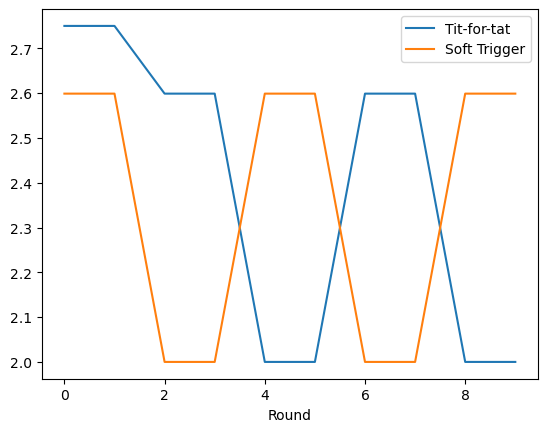

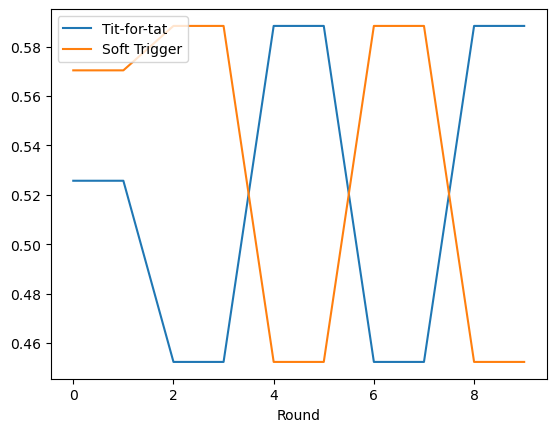

In [13]:
tab['actions'].plot(); 
tab['payoffs'].plot(); 

# Running a Tournament

This will run a full tournament between all the player functions found in the folder `player_path`. 

In [14]:
T = 100
game_data = {'profit_function1':profit1, 'profit_function2':profit2, 'discount_factor': beta, 
    'price_range': (pmin,pmax)
}
t = Tournament(player_path, RepeatedBertrandGame, game_data=game_data, T=T, tournament_name='RBG', )
t.run() # run the tournament and score the game 

6it [00:08,  1.46s/it]

Tournament winner was: Soft Trigger (against 3 opponents)


,RBG
Player,
Soft Trigger,0.334953
Best responder,0.327176
Tit-for-tat,0.291801
Randawg,0.222210


In [15]:
matchup_results = t.get_matchup_results()
matchup_results

Opponent,Randawg,Soft Trigger,Tit-for-tat,Best responder
Player,,,,
Randawg,NaN,0.218201,0.230110,0.218319
Soft Trigger,0.356356,NaN,0.331800,0.316703
Tit-for-tat,0.229913,0.329070,NaN,0.316418
Best responder,0.342797,0.318746,0.319985,NaN


In [16]:
import seaborn as sns

<Axes: xlabel='Opponent', ylabel='Player'>

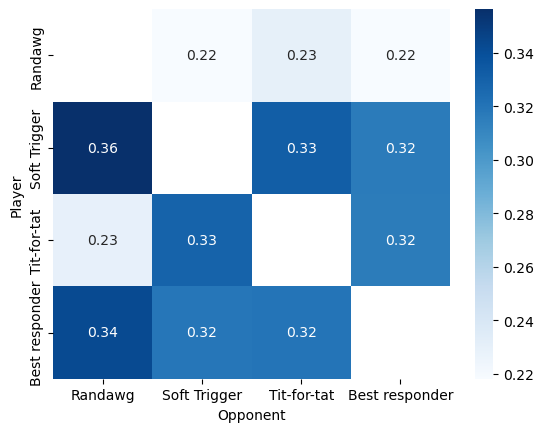

In [17]:
sns.heatmap(matchup_results, annot=True, fmt='.2f', cmap='Blues')

Print the matchup results to see if there is a pattern in who is good against whom. 

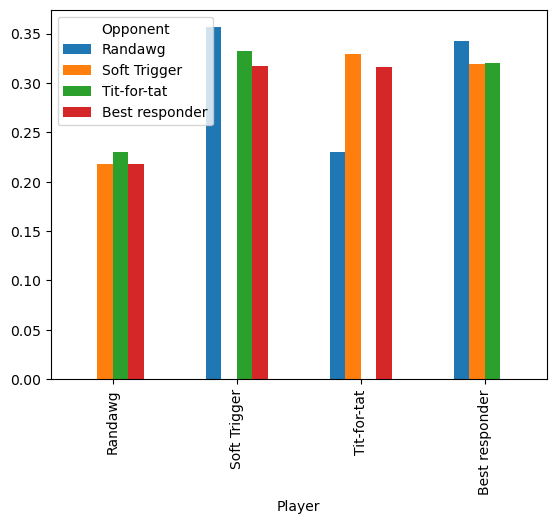

In [18]:
matchup_results.plot.bar(); 

# Access individual games

It can be useful to access individual games from the tournament to check performance. To do so, note that `t.games[:]` is the list of the games that were played. Each of these have the same printing and plotting functions as a simple game has.  

In [19]:
print(f'Available games in tournament:')
for i,g in enumerate(t.games): 
    print(f'{i}: {g.name}')

Available games in tournament:
0: Randawg vs. Soft Trigger
1: Randawg vs. Tit-for-tat
2: Randawg vs. Best responder
3: Soft Trigger vs. Tit-for-tat
4: Soft Trigger vs. Best responder
5: Tit-for-tat vs. Best responder


Showing game history for Randawg vs. Soft Trigger


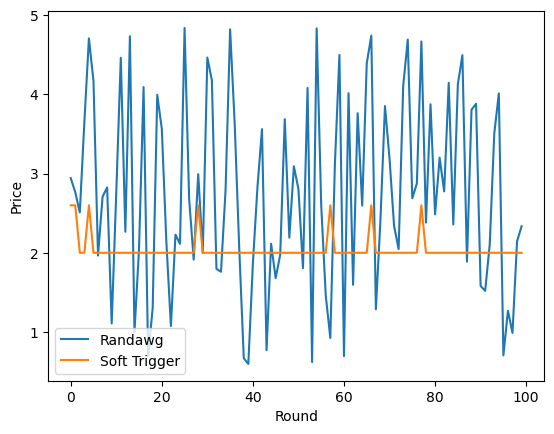

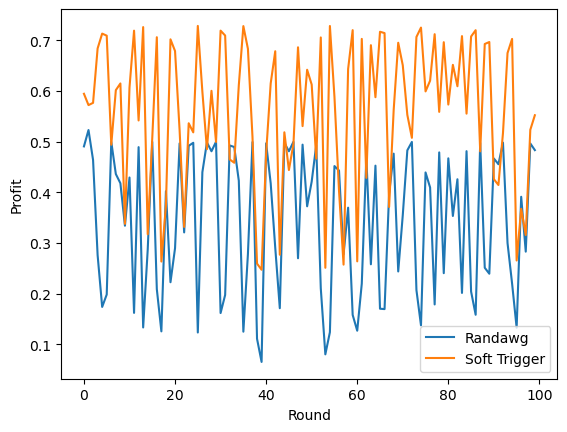

In [20]:
i_game = 0
print(f'Showing game history for {t.games[i_game].name}')
t.games[i_game].get_game_actions_and_payoffs()['actions'].plot(ylabel='Price');
t.games[i_game].get_game_actions_and_payoffs()['payoffs'].plot(ylabel='Profit');